# 0.0 Imports

In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

from IPython.display import Image
from sqlalchemy      import create_engine

In [35]:
# Notação Científica
#np.set_printoptions(suppress=True)
#pd.set_option('display.float_format', '{:.2f}'.format)

## 0.1 Data collection

In [2]:
path = 'C:\\Users\\ferki\\repos\\python_ds_ao_dev\\'
database_name = 'database_hm.sqlite'
conn = create_engine( 'sqlite:///' + path + database_name, echo=False )

In [3]:
query = """
    SELECT * FROM vitrine
"""

df_raw = pd.read_sql_query( query, conn)
df_raw.head()

,product_id,style_id,color_id,product_name,color_name,fit,product_price,size_number,size_model,cotton,polyester,spandex,scrapy_datetime
0,0985159001,0985159,001,relaxed_jeans,black,skinny_fit,39.99,185,31/32,1.00,0.00,0.01,2022-10-09 07:57:19
1,0985159002,0985159,002,relaxed_jeans,denim_blue,skinny_fit,39.99,None,None,1.00,0.00,0.01,2022-10-09 07:57:19
2,0985159003,0985159,003,relaxed_jeans,dark_gray,skinny_fit,39.99,None,None,0.99,0.63,0.01,2022-10-09 07:57:19
3,0985159004,0985159,004,relaxed_jeans,light_denim_blue,skinny_fit,39.99,183,31/32,1.00,0.00,0.01,2022-10-09 07:57:19
4,0985159005,0985159,005,relaxed_jeans,dark_blue,skinny_fit,39.99,None,None,1.00,0.00,0.01,2022-10-09 07:57:19


In [4]:
df_raw = pd.read_sql(query, con=conn )

In [5]:
df_raw.head()

,product_id,style_id,color_id,product_name,color_name,fit,product_price,size_number,size_model,cotton,polyester,spandex,scrapy_datetime
0,0985159001,0985159,001,relaxed_jeans,black,skinny_fit,39.99,185,31/32,1.00,0.00,0.01,2022-10-09 07:57:19
1,0985159002,0985159,002,relaxed_jeans,denim_blue,skinny_fit,39.99,None,None,1.00,0.00,0.01,2022-10-09 07:57:19
2,0985159003,0985159,003,relaxed_jeans,dark_gray,skinny_fit,39.99,None,None,0.99,0.63,0.01,2022-10-09 07:57:19
3,0985159004,0985159,004,relaxed_jeans,light_denim_blue,skinny_fit,39.99,183,31/32,1.00,0.00,0.01,2022-10-09 07:57:19
4,0985159005,0985159,005,relaxed_jeans,dark_blue,skinny_fit,39.99,None,None,1.00,0.00,0.01,2022-10-09 07:57:19


# 1.0 Descrição dos dados 

In [6]:
df01 = df_raw.copy()

## 1.1 Dimensão dos dados

In [7]:
print( 'Number of Rows: {}'.format( df01.shape[0] ) )
print( 'Number of Cols: {}'.format( df01.shape[1] ) )

Number of Rows: 125
Number of Cols: 13


## 1.2 Tipos de dados

In [8]:
df01.dtypes

product_id          object
style_id            object
color_id            object
product_name        object
color_name          object
fit                 object
product_price      float64
size_number         object
size_model          object
cotton             float64
polyester          float64
spandex            float64
scrapy_datetime     object
dtype: object

In [9]:
# convert object to datetime
df01['scrapy_datetime'] = pd.to_datetime( df01['scrapy_datetime'] )

In [10]:
df01.dtypes

product_id                 object
style_id                   object
color_id                   object
product_name               object
color_name                 object
fit                        object
product_price             float64
size_number                object
size_model                 object
cotton                    float64
polyester                 float64
spandex                   float64
scrapy_datetime    datetime64[ns]
dtype: object

## 1.3 Identificação de dados faltantes

In [11]:
df01.isna().sum()

product_id          0
style_id            0
color_id            0
product_name        1
color_name          0
fit                 0
product_price       1
size_number        65
size_model         76
cotton              0
polyester           0
spandex             0
scrapy_datetime     0
dtype: int64

In [12]:
df01.isna().sum() / df01.shape[0]

product_id         0.000
style_id           0.000
color_id           0.000
product_name       0.008
color_name         0.000
fit                0.000
product_price      0.008
size_number        0.520
size_model         0.608
cotton             0.000
polyester          0.000
spandex            0.000
scrapy_datetime    0.000
dtype: float64

## 1.4 Substituição dos dados faltantes

In [13]:
df_01 = df01.drop( columns=['size_number', 'size_model'] ).dropna()
df_01.shape

(124, 11)

## 1.5 Descrição dos dados

In [14]:
num_attributes = df01.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df01.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.5.1 Numeric data

In [36]:
# tendencia central - media, mediana
t1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
t2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# dispersão - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concat 
ml = pd.concat( [d2, d3, d4, t1, t2, d1, d5, d6] ).T.reset_index()
ml.columns = ['attributes', 'min', 'max', 'range', 'media', 'mediana', 'std', 'skew', 'kurtosis']
ml

,attributes,min,max,range,media,mediana,std,skew,kurtosis
0,product_price,39.99,39.99,0.00,39.99,NaN,0.00,0.00,0.00
1,cotton,0.77,1.00,0.23,0.97,0.99,0.07,-2.23,3.32
2,polyester,0.00,1.00,1.00,0.29,0.19,0.33,0.49,-1.42
3,spandex,0.00,0.02,0.02,0.01,0.01,0.01,-0.19,-0.97


In [28]:
sns.distplot(df01['product_price']);

C:\Users\ferki\anaconda3\envs\PythonDSDev\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


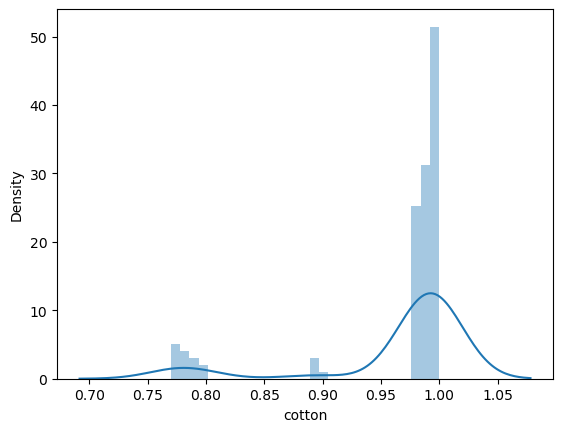

In [30]:
sns.distplot(df01['cotton']);

C:\Users\ferki\anaconda3\envs\PythonDSDev\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


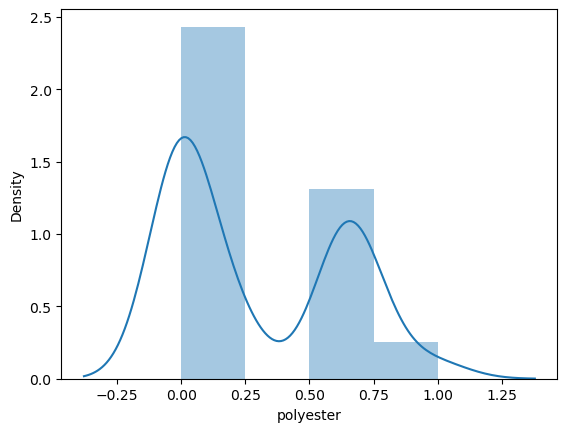

In [31]:
sns.distplot(df01['polyester']);

C:\Users\ferki\anaconda3\envs\PythonDSDev\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


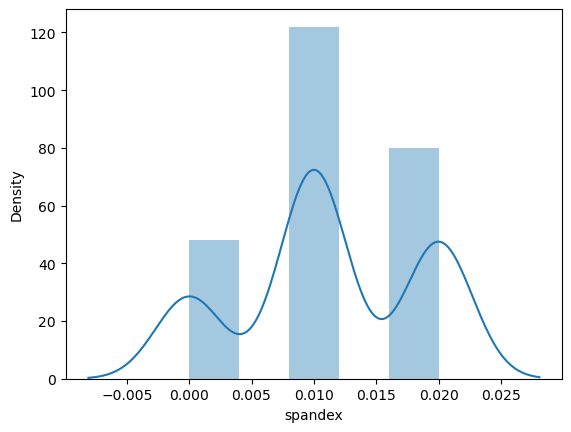

In [32]:
sns.distplot(df01['spandex']);

### 1.5.2 Categorical data

In [24]:
cat_attributes.apply( lambda x: x.unique().shape[0])

product_id      125
style_id         15
color_id         40
product_name      2
color_name       27
fit               5
size_number       9
size_model        5
dtype: int64

# 2.0 Feature Engineering

# 3.0 Filtragem de atributos

# 4.0 Exploratory Data Analysis